In [ ]:
!pip install kagglehub

In [ ]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("mkechinov/ecommerce-behavior-data-from-multi-category-store")

#print("Path to dataset files:", path)

100%|██████████| 4.29G/4.29G [02:21<00:00, 32.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/versions/8


In [1]:
import os
path = "C:/Users/User/.cache/kagglehub/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store/versions/8"
os.listdir(path)

['2019-Nov.csv', '2019-Oct.csv']

In [2]:
path2 = os.path.join(path, '2019-Oct.csv')

In [ ]:
#import pandas as pd
#
## Dask 데이터프레임 생성
#ddf = pd.read_csv(path2)
#
## 랜덤으로 1% 샘플링
#sampled_data = ddf.sample(frac=0.005, random_state=42)
#
#print(sampled_data)

In [42]:
import pandas as pd

# Dask 데이터프레임 생성
data = pd.read_csv(path2)
data['event_time'] = pd.to_datetime(data['event_time']).dt.tz_convert(None)
start_date = data['event_time'].min()  # 데이터의 시작일
end_date = start_date + pd.Timedelta(days=3)  # 시작일부터 3일간
sampled_data = data[(data['event_time'] >= start_date) & (data['event_time'] < end_date)]


print(sampled_data.head())

           event_time event_type  product_id          category_id  \
0 2019-10-01 00:00:00       view    44600062  2103807459595387724   
1 2019-10-01 00:00:00       view     3900821  2053013552326770905   
2 2019-10-01 00:00:01       view    17200506  2053013559792632471   
3 2019-10-01 00:00:01       view     1307067  2053013558920217191   
4 2019-10-01 00:00:04       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695

In [57]:
electronics = sampled_data[(sampled_data['product_id'].astype(str).str.startswith('18')) & (sampled_data['product_id'].astype(str).str.len() == 7)]

In [61]:
electronics['category_code'].value_counts()

electronics.video.tv    78014
Name: category_code, dtype: int64

In [41]:
sampled_data.shape

(3562876,)

In [43]:
print(sampled_data['product_id'].nunique())
print(sampled_data['category_code'].nunique())
print(sampled_data['user_id'].nunique())
print(sampled_data['category_id'].nunique())
print(sampled_data['brand'].nunique())
print(sampled_data['user_session'].nunique())

96654
123
466553
556
2494
768871


In [38]:
sampled_data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1117310
brand             520290
price                  0
user_id                0
user_session           0
dtype: int64

In [40]:
sampled_data['category_code']=sampled_data['category_code'].fillna('Unknown')
category = sampled_data.groupby('category_code')['category_id'].agg(category_list = list)


KeyError: 'category_code'

In [37]:

pd.set_option('display.max_rows', None)
category


,category_list
category_code,
accessories.bag,"[2053013566209917945, 2053013566209917945, 205..."
accessories.umbrella,"[2094006249627582860, 2094006249627582860, 209..."
accessories.wallet,"[2053013566243472379, 2053013566243472379, 205..."
apparel.belt,"[2053013566277026813, 2053013566277026813, 205..."
apparel.costume,"[2084962304016777941, 2084962304016777941, 208..."
apparel.dress,"[2146660887002349890, 2110937218225800069, 214..."
apparel.jacket,"[2110937217663763331, 2110937217663763331, 211..."
apparel.jeans,"[2146660887094624580, 2146660887094624580, 214..."
apparel.scarf,"[2069241407767315312, 2069241407767315312, 206..."


In [67]:
product_id_list = sampled_data.groupby("user_id")['product_id'].apply(list).reset_index()
print(product_id_list['product_id'].apply(len).value_counts())
print(product_id_list['product_id'].apply(len).value_counts().sum())

1      119849
2       68181
3       48238
4       35772
5       27053
6       21392
7       17545
8       14521
9       12208
10      10344
11       8920
12       7748
13       6646
14       5884
15       5312
16       4615
17       4163
18       3715
19       3284
20       2973
21       2638
22       2486
23       2263
24       2029
25       1836
26       1690
27       1592
28       1416
29       1361
30       1197
31       1092
32       1063
33        900
34        872
35        828
36        799
37        725
38        675
39        620
41        581
40        560
42        526
43        459
44        435
45        422
47        413
46        396
48        379
49        350
50        331
51        325
52        261
55        253
54        253
53        247
57        242
56        236
59        220
58        207
60        204
61        190
63        177
62        165
64        164
66        154
65        150
70        132
68        132
67        131
71        122
72        107
74    

In [69]:
sampled_purchase_data = sampled_data.loc[sampled_data['event_type']=='purchase']
product_id_list2 = sampled_purchase_data.groupby("user_id")['product_id'].agg(product_id_len=list).reset_index()
print(product_id_list2['product_id_len'].apply(len).value_counts())
print(product_id_list2['product_id_len'].apply(len).value_counts().sum())

1     27855
2      5994
3      1911
4       819
5       420
6       227
7       153
8        95
9        80
10       42
11       35
12       25
14       22
13       19
15       12
17        7
18        7
16        4
19        4
20        4
21        4
22        4
24        4
25        3
45        2
23        2
26        2
27        2
35        2
30        1
37        1
38        1
40        1
29        1
32        1
Name: product_id_len, dtype: int64
37766


In [ ]:
filtered_data = sampled_data[sampled_data['product_id'].astype(str).str.startswith('20')]

# Step 2: product_id가 20으로 시작하는 데이터의 user_id별 category_code 확인
result = filtered_data.groupby('product_id')['category_code'].apply(list).reset_index()
result['category_code'].is
# 결과 확인
print(result)

     product_id         category_code
0      20000003            [nan, nan]
1      20000090                 [nan]
2      20000098       [nan, nan, nan]
3      20000099  [nan, nan, nan, nan]
4      20000157                 [nan]
..          ...                   ...
193    20900784                 [nan]
194    20900791                 [nan]
195    20900808            [nan, nan]
196    20900849                 [nan]
197    20900850                 [nan]

[198 rows x 2 columns]


In [ ]:
filtered_result = result[result['category_code'].apply(lambda x: not any(pd.isna(i) for i in x))]

# 결과 확인
print(filtered_result)
filtered_result['category_code'].str.split('.')

     product_id                       category_code
85     20200021                   [sport.snowboard]
86     20200029                   [sport.snowboard]
87     20200065                   [sport.snowboard]
88     20200081                   [sport.snowboard]
89     20200083                   [sport.snowboard]
90     20200124  [sport.snowboard, sport.snowboard]
91     20200129  [sport.snowboard, sport.snowboard]
92     20200240                   [sport.snowboard]
93     20200328  [sport.snowboard, sport.snowboard]
94     20200329                   [sport.snowboard]
95     20200347                   [sport.snowboard]
96     20200348                   [sport.snowboard]
97     20200367                   [sport.snowboard]
98     20200369                   [sport.snowboard]
99     20200371                   [sport.snowboard]
100    20200400                   [sport.snowboard]
101    20400018                     [apparel.shoes]
102    20400108                     [apparel.shoes]
103    20400

In [ ]:
category_main=filtered_result['category_code'].apply(lambda x: x[0].split('.')[0])
category_main.unique()

array(['sport', 'apparel'], dtype=object)

In [15]:
purchase_data = sampled_data.loc[sampled_data['event_type'] == 'purchase',:]
user_purchase_counts = purchase_data['user_id'].value_counts()
single_purchase_users = user_purchase_counts[user_purchase_counts == 1].count()
total_purchase_users = user_purchase_counts.count()
churn_rate = single_purchase_users / total_purchase_users if total_purchase_users > 0 else 0
repeat_purchase_users = user_purchase_counts[user_purchase_counts > 1].count()
repurchase_rate = repeat_purchase_users / total_purchase_users if total_purchase_users > 0 else 0
print(f"이탈율: {churn_rate:.2%}")
print(f"재구매율: {repurchase_rate:.2%}")

이탈율: 73.76%
재구매율: 26.24%


전환율:
view → cart: 4.18%
cart → purchase: 2.32%
view → purchase: 6.33%


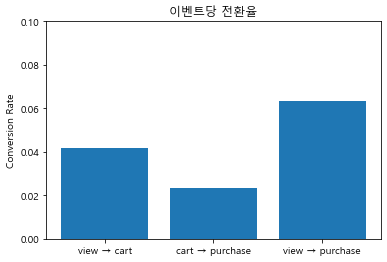

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows: 맑은 고딕

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
sampled_data=sampled_data.sort_values(by=['user_session', 'event_time'])

# 각 세션별 unique 이벤트 추출
session_events =sampled_data.groupby('user_session')['event_type'].apply(list)

# 전환율 계산
view_to_cart = session_events.apply(lambda x: 1 if 'view' in x and 'cart' in x else 0).sum() / len(session_events)
cart_to_purchase = session_events.apply(lambda x: 1 if 'cart' in x and 'purchase' in x else 0).sum() / len(session_events)
view_to_purchase = session_events.apply(lambda x: 1 if 'view' in x and 'purchase' in x else 0).sum() / len(session_events)

# 결과 출력
conversion_rates = {
    'view → cart': view_to_cart,
    'cart → purchase': cart_to_purchase,
    'view → purchase': view_to_purchase
}

print("전환율:")
for stage, rate in conversion_rates.items():
    print(f"{stage}: {rate:.2%}")

# 시각화
plt.bar(conversion_rates.keys(), conversion_rates.values())
plt.title('이벤트당 전환율')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.1)
plt.show()

In [65]:
sampled_data.describe(include='object')


,event_type,category_code,brand,user_session
count,3562876,2445566,3042586,3562876
unique,3,123,2494,768871
top,view,electronics.smartphone,samsung,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
freq,3451596,1006312,439696,533


In [66]:
sampled_data.describe()

,product_id,category_id,price,user_id
count,3.562876e+06,3.562876e+06,3.562876e+06,3.562876e+06
mean,1.027035e+07,2.056549e+18,2.996709e+02,5.314668e+08
std,1.134612e+07,1.631455e+16,3.703687e+02,1.693668e+07
min,1.001588e+06,2.053014e+18,0.000000e+00,1.835035e+08
25%,1.005115e+06,2.053014e+18,6.435000e+01,5.156121e+08
50%,5.000065e+06,2.053014e+18,1.641700e+02,5.274067e+08
75%,1.640002e+07,2.053014e+18,3.703100e+02,5.483664e+08
max,5.460000e+07,2.175420e+18,2.574070e+03,5.565467e+08


In [62]:
print(sampled_data.head())
print(sampled_data.shape)
print(sampled_data.info())
print(sampled_data.columns)
visitor = sampled_data['user_id'].nunique()
print("visitors: {}".format(visitor))

           event_time event_type  product_id          category_id  \
0 2019-10-01 00:00:00       view    44600062  2103807459595387724   
1 2019-10-01 00:00:00       view     3900821  2053013552326770905   
2 2019-10-01 00:00:01       view    17200506  2053013559792632471   
3 2019-10-01 00:00:01       view     1307067  2053013558920217191   
4 2019-10-01 00:00:04       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fcc  
2  566511c2-e2e3-422b-b695

In [ ]:
import pandas as pd
#sampled_data = ddf.sample(frac=0.01, random_state=42)
sampled_data=sampled_data.loc[sampled_data.event_type == 'purchase']
sampled_data['event_time'] = pd.to_datetime(sampled_data['event_time']).dt.tz_convert(None)

<ipython-input-15-48d71d9e0706>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data['event_time'] = pd.to_datetime(sampled_data['event_time']).dt.tz_convert(None)


In [ ]:
sampled_data.reset_index(drop=True, inplace=True)


In [ ]:
sampled_data.dtypes

In [ ]:
usecols=['event_time','event_type','price','user_id','user_session']
product_data = sampled_data.copy()
sampled_data = sampled_data[usecols]

In [ ]:
sampled_data.head()

In [ ]:
print([(column,sampled_data[column].nunique()) for column in sampled_data.columns])

###날짜별 고객수 추이

In [ ]:
visitor_by_date = sampled_data[['user_id', 'date']].drop_duplicates().groupby('date').count().sort_values(by='date', ascending=True)

In [ ]:
visitor_by_date

In [ ]:
import matplotlib.pyplot as plt
x= pd.Series(visitor_by_date.index.values)
y= visitor_by_date["user_id"]
plt.rcParams["figure.figsize"]=(20,8)
plt.plot(x,y)
plt.xticks(rotation = 45)

In [ ]:
product_by_date = sampled_data[['product_id', 'date']].groupby('date').count().sort_values(by='date', ascending=True) # 날짜별 product 갯수
price_by_date = sampled_data[['price', 'date']].groupby('date').mean().sort_values(by='date', ascending=True) # 날짜별 price 평균

### 날짜별 총판매 추이


In [ ]:
total_profit=pd.DataFrame(product_by_date['product_id']*price_by_date['price'])
total_profit.columns=['total_profit']
plt.rcParams["figure.figsize"]=(20,8)
plt.plot(total_profit.index.values, total_profit['total_profit'])

In [ ]:
purchase_data = sampled_data.loc[sampled_data['event_type'] == 'purchase',:]

In [ ]:
purchase_data.reset_index(drop=True).head(5)

In [ ]:
product_price_map = purchase_data.groupby('product_id')['price'].mean().reset_index()


In [ ]:
product_price_map

In [ ]:
top_10_df = purchase_data.groupby('product_id').count().reset_index()[['product_id', 'date']]

In [ ]:
top_10_df.columns = ['product_id', 'count']
top_10_df

In [ ]:
top_10_df = pd.merge(top_10_df, product_price_map, on='product_id', how='outer')
top_10_df['total_profit'] = top_10_df['count'] * top_10_df['price']
top_10_df.sort_values(by='total_profit', ascending=False, inplace=True)
top_10_df.head(10)

In [ ]:
top_10_df.isnull().sum()
top_10_df.reset_index(drop=True, inplace=True)

In [ ]:
purchase_data

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()
for idx, product_id in enumerate(top_10_df.loc[:9,"product_id"]):
    product_daily_price = purchase_data.loc[purchase_data['product_id'] == product_id, ['date', 'price']].groupby(['date']).mean()

        # x, y 값 생성
    x = pd.Series(product_daily_price.index.values)
    y = product_daily_price['price']

    axes[idx].plot(x, y, marker='o')
    axes[idx].set_title(f"Product ID: {product_id}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Price")
    axes[idx].tick_params(axis='x', rotation=45)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

In [ ]:
purchase_data['event_time'] = pd.to_datetime(purchase_data['event_time']).dt.tz_convert(None)
purchase_data['event_time'].min(), purchase_data['event_time'].max()

In [ ]:
purchase_data['event_type']=purchase_data['event_type'].astype('category')
purchase_data['category_code']=purchase_data['category_code'].astype('category')

In [ ]:
usecols=['event_time','event_type','price','user_id','user_session']

In [ ]:
purchase_data = purchase_data[usecols]

In [ ]:
purchase_data.dtypes

In [ ]:
purchase_data=purchase_data[usecols].groupby('user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)

In [ ]:
import datetime as dt
import numpy as np
study_date = dt.datetime(2019,11,1)
purchase_data=pd.DataFrame(purchase_data)
purchase_data['last_purchase']=study_date - purchase_data['Date_order']
purchase_data['last_purchase'].astype('timedelta64[D]')
purchase_data['last_purchase']=purchase_data['last_purchase'] / np.timedelta64(1, 'D')
purchase_data.head()

In [ ]:
recency_df.sort_values(by='Recency', ascending=False)

In [ ]:
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])
sns.histplot(data = recency_df, x ='Recency')
plt.gcf().set_size_inches(16.5, 3)

In [ ]:
frequency_df

In [ ]:
frequency_df = purchase_data.copy()
frequency_df.drop_duplicates(subset=['user_id', 'user_session'],keep = "first", inplace=True)
frequency_df = frequency_df.groupby("user_id", as_index = False)["user_session"].count() # 중복되는 값중 제일 첫번째로 나온 값이 출력
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.sort_values(by= 'Frequency',ascending=False).head()


In [ ]:
def extract_categorycode(input_text,level=0):
    '''
     this function splits category code and returns the first part.
    '''
    output_text=input_text.split('.')[level]
    return output_text

def create_clusters(input_data_frame,input_columns,n_cluster):
    '''
     This function creates clusters and cluster labels.
    '''
    from sklearn.cluster import KMeans
    X=input_data_frame[input_columns].values
    k_means=KMeans(n_clusters=n_cluster,random_state=15).fit(X)
    return k_means.labels_

In [ ]:
#creating a summary table for general overview
daily_summary_table=sampled_data.groupby(by=[sampled_data['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=sampled_data['event_type']=='purchase'
sales=sampled_data.loc[sales_filter].groupby(by=[sampled_data['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [ ]:
sampled_data.head()

In [ ]:
id_count =sampled_data.groupby(by='user_session')['user_id'].count()
id_count = id_count[id_count>1]
id_count

In [ ]:
user_id=sampled_data.groupby(by='user_session').agg(user_id=('user_id',lambda x: [x.unique()]))


In [ ]:
greater_than_one = user_id[user_id['user_session'].apply(lambda x: len(x[0])) > 1]

# 결과 출력
print(greater_than_one)

##RFM

In [ ]:
sampled_data.drop_duplicates(subset=['user_id', 'user_session'],keep = "first", inplace=True)


In [ ]:
sampled_data=sampled_data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)
sampled_data

In [ ]:
import datetime as dt
import numpy as np
study_date = dt.datetime(2019,11,1)
sampled_data=pd.DataFrame(sampled_data)
sampled_data['last_purchase']=study_date - sampled_data['Date_order']
sampled_data['last_purchase']=sampled_data['last_purchase'] / np.timedelta64(1, 'D')
sampled_data.head()

In [ ]:
print(sampled_data.dtypes)

In [ ]:
RFM= sampled_data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()

In [ ]:
len(RFM)

In [ ]:
total_df = pd.merge(product_data, RFM, on='user_id', how='inner')
total_df.head()

In [ ]:
total_df['category_code'].str.split('.',n=1).str[1]

In [ ]:
total_df['main_category']=total_df['category_code'].str.split('.').str[0]
total_df['main_category'] = total_df['main_category'].astype('category')
total_df['sub_category']=total_df['category_code'].str.split('.',n=1).str[1]
total_df['sub_category'] = total_df['sub_category'].astype('category')
total_df.drop(columns=['category_code'], inplace=True)
total_df

In [ ]:
# 'main_category', 'sub_category', 'brand' 열에 'none' 카테고리 추가
for col in ['main_category', 'sub_category', 'brand']:
    if total_df[col].dtype.name == 'category':
        total_df[col] = total_df[col].cat.add_categories("none")

# NaN 값을 'none'으로 채우기
total_df[['main_category', 'sub_category', 'brand']] = total_df[['main_category', 'sub_category', 'brand']].fillna("none")

In [ ]:
import matplotlib.pyplot as plt
import squarify
top_category_n = 15
top_main_category = total_df['main_category'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_main_category, 'top_main_category':top_main_category })
plt.figure(figsize=(20, 8))
squarify.plot(sizes=top_main_category, label=top_main_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

In [ ]:
top_category_n = 20
top_sub_category = total_df['sub_category'].value_counts()[:top_category_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_sub_category, 'top_sub_category':top_sub_category })
plt.figure(figsize=(20, 8))
squarify.plot(sizes=top_sub_category, label=top_sub_category.index.array, color=["red","cyan","green","orange","blue","grey"], alpha=.7  )
plt.axis('off')
plt.show()

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#def extract_categorycode(input_text,level=0):
#    '''
#     this function splits category code and returns the first part.
#    '''
#    output_text=input_text.split('.')[level]
#    return output_text
#
#def create_clusters(input_data_frame,input_columns,n_cluster):
#    '''
#     This function creates clusters and cluster labels.
#    '''
#    from sklearn.cluster import KMeans
#    X=input_data_frame[input_columns].values
#    k_means=KMeans(n_clusters=n_cluster,random_state=42).fit(X)
#    return k_means.labels_

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# 날짜 관련 변수 생성
total_df['event_date'] = pd.to_datetime(total_df['event_time'])
total_df['hour'] = total_df['event_date'].dt.hour
total_df['day'] = total_df['event_date'].dt.day
total_df['weekday'] = total_df['event_date'].dt.weekday

# 범주형 데이터 인코딩
total_df['event_type'] = LabelEncoder().fit_transform(total_df['event_type'])
total_df['brand'] = LabelEncoder().fit_transform(total_df['brand'])
total_df['main_category'] = LabelEncoder().fit_transform(total_df['main_category'])
total_df['sub_category'] = LabelEncoder().fit_transform(total_df['sub_category'])

# 연속형 변수 스케일링
scaler = MinMaxScaler()
cluster_df = pd.DataFrame(columns = ['price','recency', 'frequency', 'monetary'])
cluster_df['price'] = pd.Series(scaler.fit_transform(total_df[['price']]).flatten(), index=total_df.index)
cluster_df['recency'] = scaler.fit_transform(total_df[['Recency']])
cluster_df['frequency'] = scaler.fit_transform(total_df[['Frequency']])
cluster_df['monetary'] = scaler.fit_transform(total_df[['Monetary']])
cluster_df['main_category'] = total_df['main_category']
cluster_df['sub_category'] = total_df['sub_category']

total_df.head()

In [ ]:
cluster_df = pd.get_dummies(cluster_df, columns = ["main_category",'sub_category'])

cluster_df


In [ ]:
cluster_df['frequency'].value_counts()

In [ ]:
from sklearn.cluster import KMeans
k_range = range(1, 11)  # 클러스터 개수 1~10
inertia = []  # 관성을 저장할 리스트

# 각 클러스터 수에 대해 K-means 실행
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)  # 관성 저장

# Elbow Method 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
k_range = range(2, 11)
silhouette_scores = []
from sklearn.metrics import silhouette_score
# K-means 실행 및 실루엣 점수 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(cluster_df)
    score = silhouette_score(cluster_df, labels)
    silhouette_scores.append(score)

# 실루엣 점수 그래프
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k (with Encoded Categorical Variables)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
onehotcolumn = [col for col in cluster_df.columns if col.startswith('main_category_') or col.startswith('sub_category_')]
label = create_clusters(cluster_df,['price','recency', 'frequency', 'monetary'] + onehotcolumn ,4)

In [ ]:
cluster_df['label'] = label


In [ ]:
cluster_df

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(cluster_df)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster'] = label
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in pca_df['cluster'].unique():
    cluster_points = pca_df[pca_df['cluster'] == cluster]
    ax.scatter(cluster_points['PCA1'], cluster_points['PCA2'], cluster_points['PCA3'], label=f'Cluster {cluster}')

ax.set_title('Clustering Visualization using PCA', fontsize=16)
ax.set_xlabel('PCA1', fontsize=14)
ax.set_ylabel('PCA2', fontsize=14)
ax.set_zlabel('PCA3', fontsize= 14)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_df)

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = label
plt.figure(figsize=(10, 8))

for cluster in pca_df['cluster'].unique():
    cluster_points = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster}')

plt.title('Clustering Visualization using PCA', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
total_df

In [ ]:
total_df['cluster'] = label
rfm_col = ['Recency', 'Frequency', 'Monetary']
rfm_mean = total_df.groupby('cluster')[rfm_col].mean()


In [ ]:
rfm_mean['Recency'].mean() #product_id 가 20으로 시작하는건 전자기기였다!